<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/ML_Regression/AST_01_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 1: Regression Models

## Learning Objectives

At the end of the experiment, you will be able to:

* have an overview of the basics of Machine Learning

* understand the implementation of Train/Test Split

* develop an understanding of Least Squares, Learning Curves

* perform Linear Regression

* have an understanding of Regularization of Linear Models


In [ ]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.chn.talentsprint.com/content/Regression_Models.mp4">
</video>""")

### Introduction

**Machine learning** is a subfield of artificial intelligence (AI). The goal of machine learning is to understand the structure of data and model(fit) the data so that it can accurately predict the label or output for similar unseen data.

**Machine Learning use cases:**

Detecting tumors in brain scans, automatically classifying news articles, automatically flagging offensive comments on discussion forums,
summarizing long documents automatically,
creating a chatbot or a personal assistant,
detecting credit card fraud,
making your app react to voice commands,
building an intelligent bot for a game.

**Machine Learning Workflow:**

1. Frame the ML problem by looking at the business need
2. Gather the data and do Data Munging/Wrangling for each subproblem
3. Explore different models, perform V&V and shortlist promising candidates
4. Fine-tune shortlisted models and combine them together to form the final  solution
5. Present your solution  
6. Deploy


**Model training and testing**

![wget](https://cdn.iisc.talentsprint.com/CDS/Images/model_train_test1.png)



### Training, Validation, and Test Set

A machine learning algorithm splits the Dataset into two sets.

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into two subsets:

**Training Dataset:** The sample of data used to fit the model.

**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

We usually split the data as 80% for training stage and 20% for testing stage. 70% train and 30% test or 75% train and 25% test are also often used.

**Validation Set:** This is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.


<img src="https://miro.medium.com/max/700/1*aNPC1ifHN2WydKHyEZYENg.png" alt="drawing" width="500"/>


#### Prerequisites for using train_test_split()

We will use scikit-learn, or sklearn which has many packages for data science and machine learning.

**Applying train_test_split()**

You need to import:

1.   train_test_split()
2.   NumPy

We import NumPy because, in supervised machine learning applications, you’ll typically work with two such sequences:

* A two-dimensional array with the inputs (x)
* A one-dimensional array with the outputs (y)






**sklearn.model_selection.train_test_split(arrays, options)**

* **arrays** is the sequence of lists, NumPy arrays, pandas DataFrames, or similar array-like objects that hold the data you want to split. All these objects together make up the dataset and must be of the same length.

* **options** are the optional keyword arguments that you can use to get desired behavior:

  * **train_size** is the number that defines the size of the training set.

  * **test_size** is the number that defines the size of the test set. You should provide either train_size or test_size.
      * If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.
      * If float (eg 0.25), it represents the proportion of the dataset to include in the test split and should be between 0.0 and 1.0.
      * If int (eg. 4), it represents the absolute number of test samples, eg. 4 samples of 12.
      * If None, the value is set to the complement of the train size.
      * If train_size is also None, it will be set to 0.25.

  * **random_state** is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

  * **shuffle** is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

  * **stratify** is an array-like object that, if not None, determines how to use a stratified split.



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2301931" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9665220904" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_01_Regression_models_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/auto_mpg.csv")
    ipython.magic("sx wget 'https://cdn.iisc.talentsprint.com/CDS/Datasets/Real_estate.csv'")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Let us use a small dataset to understand how to implement a train and test split

#### Creating a simple dataset to work with

In [5]:
# inputs in the two-dimensional array X
X = np.arange(1, 25).reshape(12, 2)

# outputs in the one-dimensional array y
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [6]:
print(X)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [23 24]]


In [7]:
# YOUR CODE HERE to display 'y'
print(y)

[0 1 1 0 1 0 0 1 1 0 1 0]


#### Splitting input and output datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=4)

In [9]:
X_train

array([[17, 18],
       [ 5,  6],
       [23, 24],
       [ 1,  2],
       [ 3,  4],
       [11, 12],
       [15, 16],
       [21, 22]])

In [ ]:
# YOUR CODE HERE to display X_test

In [ ]:
# YOUR CODE HERE to display y_train

In [ ]:
# YOUR CODE HERE to display y_test

### Develop an understanding of Least Squares

**Least Squares** method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.

**Calculate Line Of Best Fit**

A more accurate way of finding the line of best fit is the least square method.

Use the following steps to find the equation of line of best fit for a set of ordered pairs $(x_1,y_1),(x_2,y_2),...(x_n,y_n)$.

**Step 1:** Calculate the slope ‘m’ by using the following formula:

$$m = \frac{\sum \left ( x-\bar{x} \right )*\sum \left ( y-\bar{y} \right )}{\sum \left ( x-\bar{x} \right )^{2}}$$


**Step 2:** Compute the y -intercept of the line by using the formula:

$$c = y - mx$$

**Step 3:** Substitute the values in the final equation

$$y = mx + c$$

* y: dependent variable
* m: the slope of the line
* x: independent variable
* c: y-intercept


As an example, we will try to find the least squares regression line for the below data set:

\begin{array} {|r|r|}\hline Hours Spent & Grade \\\hline 6 & 82 \\ \hline 10 & 88 \\ \hline 2 & 56 \\ \hline 4 & 64 \\ \hline 6 & 77 \\ \hline 7 & 92 \\ \hline 0 & 23 \\ \hline 1 & 41 \\ \hline 8 & 80 \\ \hline 5 & 59 \\ \hline 3 & 47 \\ \hline  \end{array}

$x$ = HoursSpent

$y$ = Grade

$\bar{x}$ = 4.72

$\bar{y}$ = 64.45


\begin{array} {|r|r|}\hline Hours Spent & Grade &  x - \bar{x}  & y - \bar{y} & (x - \bar{x})*(y - \bar{y}) \\ \hline 6 & 82 & 1.27 & 17.55 & 22.33 \\ \hline 10 & 88 & 5.27 & 23.55 & 124.15 \\ \hline 2 & 56 & -2.73 & -8.45 & 23.06 \\ \hline 4 & 64 & -0.73 & -0.45 & 0.33 \\ \hline 6 & 77 & 1.27 & 12.55 & 15.97 \\ \hline 7 & 92 & 2.27 & 27.55 & 62.60 \\ \hline 0 & 23 & -4.73 & -41.45 & 195.97 \\ \hline 1 & 41 & -3.73 & -23.42 & 87.42 \\ \hline 8 & 80 & 3.27 & 15.55 & 50.88 \\ \hline 5 & 59 & 0.27 & -5.45 & -1.49 \\ \hline 3 & 47 & -1.73 & -17.45 & 30.15 \\ \hline  \end{array}


$$\sum \left ( x-\bar{x} \right )*\sum \left ( y-\bar{y} \right ) = 611.36$$

$$\sum \left ( x-\bar{x} \right )^{2} = 94.18$$

$$m = \frac{611.36}{94.18}$$

$$m = 6.49$$

**Calculate the intercept:**

$$c = y - mx$$

$$c = 64.45-(6.49*4.72)$$

$$c = 64.45 – 30.63$$

$$c = 30.18$$

Now that we have all the values to fit into the equation. If we want to know the predicted grade of someone who spends 2.35 hours on their essay, all we need to do is substitute that in for X.

$$y =  (6.49 * X) + 30.18 $$

$$y = (6.49 * 2.35) + 30.18$$

$$y = 45.43$$










### Example: Ordinary least squares Linear Regression

Ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

Geometrically, this is seen as the sum of the squared distances, parallel to the axis of the dependent variable, between each data point in the set and the corresponding point on the regression surface—the smaller the differences, the better the model fits the data.

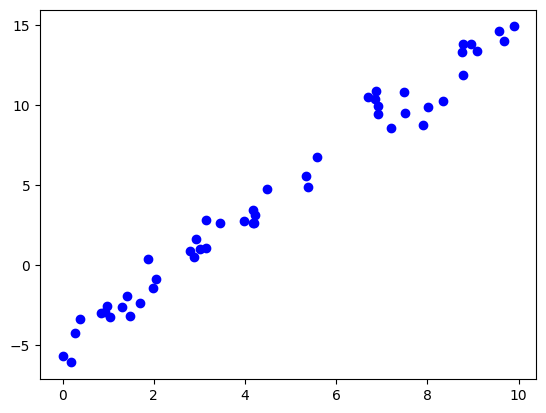

In [10]:
# Generating Sample data

rng = np.random.RandomState(1)              # instantiate random number generator
x = 10 * rng.rand(50)                       # generate 50 random numbers from uniform distribution
y = 2 * x - 5 + rng.randn(50)               # use 50 random numbers from normal distribution as noise
plt.scatter(x, y, c='b');

**Using Scikit-Learn's Linear Regression estimator to fit the above data and construct the best-fit line**

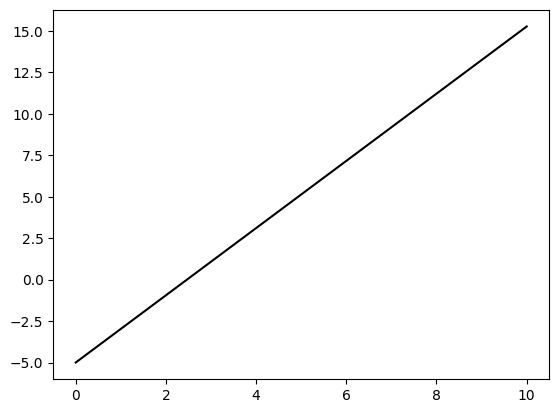

In [11]:
model = LinearRegression(fit_intercept=True)                   # instantiate LinearRegression

model.fit(x[:, np.newaxis], y)                                 # fit the model on data using 'x' as column vector

xfit = np.linspace(0, 10, 1000)                                # create 1000 points between 0 and 10
yfit = model.predict(xfit[:, np.newaxis])                      # predict the values for dependent variable

# YOUR CODE HERE for scatter plot of data points
plt.plot(xfit, yfit, 'k');

### Learning Curves

Learning curve in machine learning is used to assess how models will perform with varying numbers of training samples.  This is achieved by monitoring the training and validation scores (model accuracy) with an increasing number of training samples.

Below image showcases 'Learning curves representing high bias and high variance'.

- orange dashed line - represent training
- blue line - represent validation
- black dashed line - desired model accuracy

![wget](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-19-at-6.22.21-AM-1.png)

### Example: Simple linear regression combined with the polynomial preprocessor

#### Polynomial Features

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature $X$, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in $X$, e.g. $X^2$. This process can be repeated for each input variable in the dataset, creating a transformed version of each. And, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

In [12]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))# using a pipeline to string these operations together

#### Creating data to fit into the model

In [14]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    # YOUR CODE HERE to return X, y
    return X,y

X, y = make_data(40)

#### Learning curve in Scikit-Learn

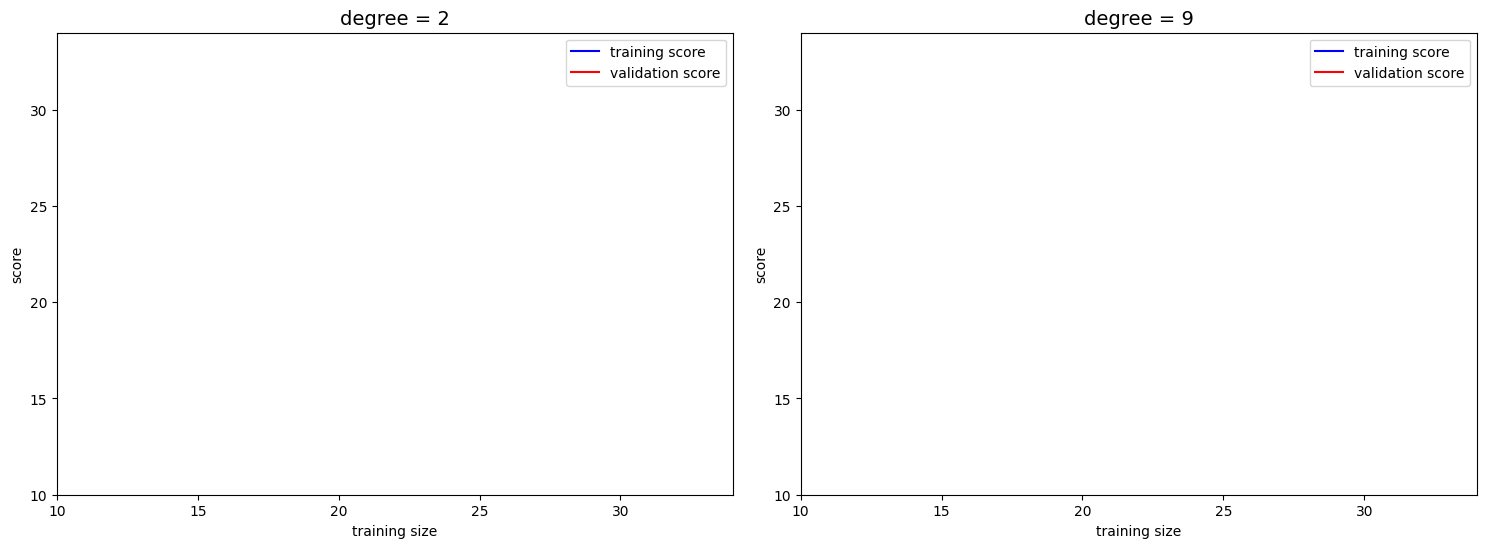

In [17]:
# learning curve for generated dataset with a second-order polynomial model and a ninth-order polynomial

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    # YOUR CODE HERE to plot (N, np.mean(val_lc, 1)) with color='red', label='validation score'
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    # YOUR CODE HEREto set ylim as (0, 1)
    ax[i].set_ylim(N[0], N[-1])
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    # YOUR CODE HERE to set ylabel to 'score'
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### Example: Machine Learning Workflow using Linear-Regression with Auto-MPG Dataset

#### Dataset

In this example, we will be using the “Auto-MPG” dataset.

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Number of instances: 398

**Problem statement:** Predict the fuel consumption in miles per gallon.

#### Loading Data

In [18]:
# Read data
auto = pd.read_csv("auto_mpg.csv")

Displaying Dataframe

In [19]:
# YOUR CODE HERE to show few rows of 'auto' dataframe
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


#### Exploring the dataset

In [20]:
# print names of the features
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [21]:
# generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [22]:
# summary of the DataFrame
# YOUR CODE HERE to display summary of 'auto' dataframe using info() method
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Checking for Missing values

In [ ]:
auto.isna().sum()

### Visualization of Auto-MPG Dataset

#### Creating a pairplot and a heatmap to check which features seems to be more correlated


In [ ]:
# Pairplot
plt.style.use('ggplot')
sns.pairplot(auto)

In [ ]:
# Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(auto.corr(), annot=True, linewidth=0.5, center=0)
plt.show()

From the above plots, we can see that the features cylinders, displacement, and weight are highly correlated. We can use anyone of them for modeling.

### Modeling and Prediction (Linear Regression)

In [ ]:
auto.head()

In [ ]:
# Datatypes of all features
auto.dtypes

In [ ]:
# Unique values in horsepower column
auto['horsepower'].unique()

In [ ]:
# Removing '?' from horsepower column
auto = auto[auto['horsepower'] != '?']
auto['horsepower'].unique()

In [ ]:
# Converting horsepower column datatype from string to float
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dtypes

In [ ]:
# Pridiction features
X = auto[['displacement', 'horsepower', 'acceleration', 'model year', 'origin']]
# Target feature
# YOUR CODE HERE to create 'y' by selecting 'mpg' column from 'auto' dataframe
# YOUR CODE HERE to show 'X'

In [ ]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [ ]:
X_train.head()

In [ ]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [ ]:
# Training/Fitting the Model
lr.fit(X_train, y_train)

Testing

In [ ]:
# Making Predictions
pred = lr.predict(X_test)

In [ ]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
print('Coefficient of Determination:', r2_score(y_test, pred))

Predicting the value

In [ ]:
pred = lr.predict(X_test)
print('Predicted fuel consumption(mpg):', pred[2])
print('Actual fuel consumption(mpg):', y_test.values[2])

### Let us now apply the above learnings to perform a linear regression based price prediction, using a 'Real estate' dataset (Practice Ungraded)

Linear regression model implementation

  * Fit the model
  * Do the prediction
  * Plot the straight line for the predicted data using linear regression model



#### Dataset

In this example, we will be using the “Real estate price prediction” dataset

- Transaction date (purchase)
- House age
- Distance to the nearest MRT station (metric not defined)
- Amount of convenience stores
- Location (latitude and longitude)
- House price of unit area

**Problem statement:** Predict the house price of unit area based on various features provided such as house age, location, etc.

#### Importing the dataset

In [ ]:
df = pd.read_csv('Real_estate.csv')

# Taking only the selected two attributes from the dataset
df_binary = df[['X2 house age', 'Y house price of unit area']]

# YOUR CODE HERE to display first five rows of 'df'

#### Dropping non-useful columns

In [ ]:
# dropping columns

# YOUR CODE HERE

#### Finding if there are any null values

In [ ]:
# YOUR CODE HERE

#### Exploring the data scatter

In [ ]:
# YOUR CODE HERE

#### Training our model

In [ ]:
# Separating the data into independent and dependent variables

# YOUR CODE HERE

Splitting the data into training and testing data

In [ ]:
# YOUR CODE HERE

#### Training the Linear Regression model on the Training set

In [ ]:
# YOUR CODE HERE

Training/Fitting the Model

In [ ]:
# YOUR CODE HERE

#### Exploring the results

In [ ]:
# Data scatter of predicted values

# YOUR CODE HERE

### Regularized Linear Models

A good  way  to  reduce  overfitting  is  to  regularize  the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

For a linear model, regularization is typically achieved by constraining the weights of the model.

Three different ways to constrain the weights:

1. Ridge Regression

2. Lasso Regression

3. Elastic Net




#### **Ridge regression**

**Ridge regression** or **Tikhonov regularization** is the regularization technique that performs L2 regularization. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients.

- **sklearn.linear_model.Ridge** is the module used to solve a regression model where the loss function is the linear least squares function and regularization is L2.

#### Ridge Regression with Scikit-Learn

In [ ]:
n_samples, n_features = 15, 10
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

rdg = linear_model.Ridge(alpha = 0.5)        # instantiate Ridge regressor
# YOUR CODE HERE to fit(x, y) on 'rdg'
rdg.score(X,y)

#### **LASSO (Least Absolute Shrinkage and Selection Operator)**

LASSO is the regularisation technique that performs L1 regularisation. It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the summation of the absolute value of coefficients.

 - **sklearn.linear_model.Lasso** is a linear model, with an added regularisation term, used to estimate sparse coefficients.




#### Lasso Regression with Scikit-Learn

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients

# YOUR CODE HERE to create 'Lreg' by instantiating Lasso regressor with (alpha = 0.5)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Once fitted, the model can predict new values as follows:


In [ ]:
Lreg.predict([[0,1]])

In [ ]:
# weight vectors
Lreg.coef_

In [ ]:
# Calculating intercept
Lreg.intercept_

In [ ]:
#Calculating number of iterations
Lreg.n_iter_

#### **Elastic-Net Regession**

**Elastic-Net** is a regularised regression method that linearly combines both penalties i.e. L1 and L2 of the Lasso and Ridge regression methods.

#### Elastic Net Regression with Scikit-Learn

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients

ENreg = linear_model.ElasticNet(alpha = 0.5,random_state = 0)
ENreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Once fitted, the model can predict new values as follows:


In [ ]:
ENreg.predict([[0,1]])

In [ ]:
# weight vectors
# YOUR CODE HERE

In [ ]:
# Calculating intercept
# YOUR CODE HERE

In [ ]:
# Calculating number of iterations
# YOUR CODE HERE

### Understanding Significance of Alpha

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Lasso regression is a common modeling technique to do regularization. So, we will be applying varying levels of alpha to show the effect on the coefficients.



In [ ]:
Lreg = linear_model.Lasso(alpha = 0.25)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lreg.coef_  # weight vectors

In [ ]:
Lreg = linear_model.Lasso(alpha = 0.5)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lreg.coef_  # weight vectors

In [ ]:
# YOUR CODE HERE using (alpha = 0.75)

From the above 3 code cells, we could see that the coefficient value has been decreasing as the value of alpha is increased.


\begin{array} {|r|r|}\hline AlphaValues & Coefficient Values \\\hline 0.25 & 0.625 \\ \hline .5 & .25 \\ \hline .75 & 0. \\ \hline  \end{array}

### Theory Questions


1. What is the difference between the training set and the test set?

    The training set is a subset of your data on which your model will learn how to predict the dependent variable with the independent variables.

    The test set is the complimentary subset from the training set, on which you will evaluate your model to see if it manages to predict correctly the dependent variable with the independent variables.



2. Why do we split on the dependent variable?

    We want to have well-distributed values of the dependent variable in the training and test set. For example, if we only had the same value of the dependent variable in the training set, our model wouldn't be able to learn any correlation between the independent and dependent variables.




3. What is the purpose of a validation set?

    The Validation Set is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.



4. How do you choose the value of the regularization hyperparameter?

      A common solution to this problem is called holdout validation: you simply hold out part of the training set to evaluate several candidate models and select the best one.
      
      The new held out set is called the validation set (or sometimes the development set, or dev set).



5. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

   If the model performs poorly to new instances, then it has overfitted on the training data. To solve this, we can do any of the following three: get more data, implement a simpler model, or eliminate outliers or noise from the existing data set.

### Please answer the questions below to complete the experiment:




In [ ]:
#@title What is the most common criterion used to determine the best-fitting line? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "The line that goes through the most points", "The line that has the same number of points above it as below it", "The line that minimizes the sum of squared errors of prediction"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")